In [1]:
!pip install pandas tensorflow

In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
trX = pd.read_csv("../dataset/LSME-processed-train-01.csv")
tsX = pd.read_csv("../dataset/LSME-processed-test-01.csv")
means = pd.read_csv("../dataset/LSME-processed-means-01.csv")
stds = pd.read_csv("../dataset/LSME-processed-stds-01.csv")

In [3]:
trX = trX.drop(columns=["Unnamed: 0", "DateTime", "hour", "month", "day"])
tsX = tsX.drop(columns=["Unnamed: 0", "DateTime", "hour", "month", "day"])
trY = trX["Ym"]
trX = trX.drop(columns=["Y", "X1", "X2", "X3", "X4"])

In [4]:
for i in range(1440):
    trX["Ymp" + str(i+1)] = trX["Ym"].shift(-i)
    if ((i+1) % 40 == 0):
        trX = trX.copy()
        print("Done for " + str(i+1))
trX = trX.drop(columns=["Ym"])

Done for 40
Done for 80
Done for 120
Done for 160
Done for 200
Done for 240
Done for 280
Done for 320
Done for 360
Done for 400
Done for 440
Done for 480
Done for 520
Done for 560
Done for 600
Done for 640
Done for 680
Done for 720
Done for 760
Done for 800
Done for 840
Done for 880
Done for 920
Done for 960
Done for 1000
Done for 1040
Done for 1080
Done for 1120
Done for 1160
Done for 1200
Done for 1240
Done for 1280
Done for 1320
Done for 1360
Done for 1400
Done for 1440


In [5]:
trX = trX[:-1439]

In [6]:
means

Unnamed: 0              0
0         X1       6.520033
1         X2      12.528736
2         X3     261.430021
3         X4     106.260820
4          Y  504322.861242

In [7]:
stds

Unnamed: 0              0
0         X1       1.982503
1         X2       3.212579
2         X3     363.704356
3         X4     169.071949
4          Y  121948.222159

In [8]:
trX.shape

(40493, 1448)

In [9]:
rrX = trX[:28000].to_numpy()
rrY = trY[:28000].to_numpy()
vvX = trX[28000:34000].to_numpy()
vvY = trY[28000:34000].to_numpy()
ssX = trX[34000:].to_numpy()
ssY = trY[34000:].to_numpy()

In [10]:
rrX.shape

(28000, 1448)

In [11]:
labels = [ 
    tf.keras.layers.Dense(1000, activation="relu", input_shape=rrX[0].shape),
    tf.keras.layers.Dense(
        1000, 
        activation="relu",
    ),
    tf.keras.layers.Dense(
        500, 
        activation="relu",
    ),
    tf.keras.layers.Dense(
        200, 
        activation="relu",
    ),
    # tf.keras.layers.Dropout(0.15),
    tf.keras.layers.Dense(
        200, 
        activation="relu",
    ),
    tf.keras.layers.Dense(
        200, 
        activation="relu",
    ),
    tf.keras.layers.Dense(
        200, 
        activation="relu",
    ),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(
        200, 
        activation="relu",
    ),
    tf.keras.layers.Dense(
        200, 
        activation="relu",
    ),
    tf.keras.layers.Dense(
        200, 
        activation="relu",
    ),
    # tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(
        200, 
        activation="relu",
    ),
    tf.keras.layers.Dense(
        150, 
        activation="relu",
    ),
    tf.keras.layers.Dense(
        150, 
        activation="relu",
    ),
    tf.keras.layers.Dropout(0.08),
    tf.keras.layers.Dense(
        150, 
        activation="relu",
    ),
    tf.keras.layers.Dense(
        150, 
        activation="relu",
    ),
    tf.keras.layers.Dense(
        150, 
        activation="relu",
    ),
    tf.keras.layers.Dense(
        150, 
        activation="relu",
    ),
    tf.keras.layers.Dense(
        150, 
        activation="relu",
    ),
    tf.keras.layers.Dense(
        150, 
        activation="relu",
    ),
    tf.keras.layers.Dense(
        1,
        kernel_initializer=tf.keras.initializers.RandomNormal(stddev=1),
        bias_initializer=tf.keras.initializers.RandomNormal(stddev=1)
    )
]

    
model = tf.keras.Sequential(
    labels
)

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1000)              1449000   
                                                                 
 dense_1 (Dense)             (None, 1000)              1001000   
                                                                 
 dense_2 (Dense)             (None, 500)               500500    
                                                                 
 dense_3 (Dense)             (None, 200)               100200    
                                                                 
 dense_4 (Dense)             (None, 200)               40200     
                                                                 
 dense_5 (Dense)             (None, 200)               40200     
                                                                 
 dense_6 (Dense)             (None, 200)               4

In [13]:
learnrate = 0.0000017

learnrate_sched = tf.keras.optimizers.schedules.ExponentialDecay(
    learnrate,
    decay_steps=100000,
    decay_rate=0.9755,
    staircase=False
)


model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=learnrate_sched), 
    loss = "mse", 
    metrics = [ 
        tf.keras.metrics.RootMeanSquaredError(),
        tf.keras.metrics.MeanAbsoluteError()
    ]
)

In [14]:
print(np.any(np.isnan(rrX)))
print(np.any(np.isnan(rrY)))

False
False


In [15]:
batch = 40
epochs = 30

model_log = model.fit(
    rrX, rrY,
    batch_size = batch, 
    epochs = epochs, 
    verbose = 1,
    validation_data = (vvX, vvY)
)

Epoch 1/30
700/700 [==============================] - 4s 4ms/step - loss: 0.6331 - root_mean_squared_error: 0.7957 - mean_absolute_error: 0.6115 - val_loss: 0.6765 - val_root_mean_squared_error: 0.8225 - val_mean_absolute_error: 0.6146
Epoch 2/30
700/700 [==============================] - 3s 4ms/step - loss: 0.2267 - root_mean_squared_error: 0.4761 - mean_absolute_error: 0.3524 - val_loss: 0.1124 - val_root_mean_squared_error: 0.3352 - val_mean_absolute_error: 0.2772
Epoch 3/30
700/700 [==============================] - 3s 4ms/step - loss: 0.0945 - root_mean_squared_error: 0.3073 - mean_absolute_error: 0.2321 - val_loss: 0.0663 - val_root_mean_squared_error: 0.2576 - val_mean_absolute_error: 0.2003
Epoch 4/30
700/700 [==============================] - 3s 4ms/step - loss: 0.0683 - root_mean_squared_error: 0.2614 - mean_absolute_error: 0.1973 - val_loss: 0.0509 - val_root_mean_squared_error: 0.2256 - val_mean_absolute_error: 0.1726
Epoch 5/30
700/700 [==============================] - 3s

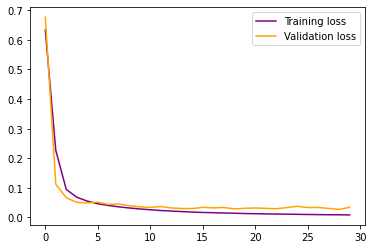

In [16]:
plt.plot(model_log.history['loss'], color="purple", label="Training loss")
plt.plot(model_log.history['val_loss'], color="orange", label="Validation loss")
plt.legend()
plt.show()

In [17]:
predY = model.predict(ssX)
predY2 = predY*1.2

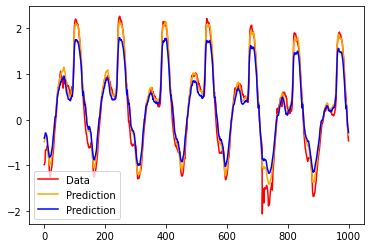

In [18]:
plt.plot(ssY[:1000], color="red", label="Data")
plt.plot(predY2[:1000], color="orange", label="Prediction")
plt.plot(predY[:1000], color="blue", label="Prediction")
plt.legend()
plt.show()

In [65]:
model.save("densemodel.h5")

# Checking

In [40]:
trX = pd.read_csv("../dataset/LSME-processed-train-01.csv")
tsX = pd.read_csv("../dataset/LSME-processed-test-01.csv")

In [80]:
means = pd.read_csv("../dataset/LSME-processed-means-01.csv", index_col=0)
stds = pd.read_csv("../dataset/LSME-processed-stds-01.csv", index_col=0)

means

0
X1       6.520033
X2      12.528736
X3     261.430021
X4     106.260820
Y   504322.861242

In [41]:
trX = trX.drop(columns=["Unnamed: 0", "DateTime", "hour", "month", "day"])
tsX = tsX.drop(columns=["Unnamed: 0", "DateTime", "hour", "month", "day"])
trY = trX["Ym"]
trX = trX.drop(columns=["Y","Ym","X1","X2","X3","X4"])
tsX = tsX.drop(columns=["X1","X2","X3","X4"])

In [42]:
trX

doy      time  dow  week       X1m       X2m       X3m       X4m
0        1  0.000000    5     0 -2.185974  0.383263 -0.718616 -0.627580
1        1  0.166667    5     0 -2.210354  0.426842 -0.718548 -0.627841
2        1  0.333333    5     0 -2.227336  0.426842 -0.718577 -0.627726
3        1  0.500000    5     0 -2.259618  0.457970 -0.718473 -0.627757
4        1  0.666667    5     0 -2.293245  0.501548 -0.718627 -0.627841
...    ...       ...  ...   ...       ...       ...       ...       ...
41927  292  3.833333    2    42 -0.334611  1.597241 -0.718498 -0.627672
41928  292  4.000000    2    42 -0.332929  1.597241 -0.718473 -0.627610
41929  292  4.166667    2    42 -0.339655  1.603467 -0.718523 -0.627326
41930  292  4.333333    2    42 -0.334611  1.597241 -0.718473 -0.627672
41931  292  4.500000    2    42 -0.324522  1.603467 -0.718587 -0.627495

[41932 rows x 8 columns]

In [43]:
def getData(start, length):
    end = start+length
    if (start > trX.shape[0]):
        return tsX[(start-trX.shape[0]):(end-trX.shape[0])].reset_index(drop=True).to_numpy()
    if (end < trX.shape[0]):
        return trX[start:end].to_numpy()
    return pd.concat([trX[start:],tsX[:(end-trX.shape[0])]]).to_numpy()

In [44]:
getData(41925,20).shape

(20, 8)

In [67]:
def generate(model, start, length, wsize = 1439):
    predY = np.zeros((length,))
    # wsize = 1440
    window = trY[(start-wsize):start].to_numpy()
    result = []
    data = getData(start,length)
    for i in range(length):
        merged = np.append(data[i], window, 0)
        predY = model.predict(merged.reshape(1,merged.shape[0]))
        result.append(predY[0][0])
        window = np.append(window[1:], predY[0], 0)
        if ((i+1) % 1000 == 0):
            print("Done for " + str(i+1))
    return result

In [64]:
predsY = generate(model,28000,13932,1440) #len = 11923

Done for 10
Done for 20
Done for 30
Done for 40
Done for 50
Done for 60
Done for 70
Done for 80
Done for 90
Done for 100
Done for 110
Done for 120
Done for 130
Done for 140
Done for 150
Done for 160
Done for 170
Done for 180
Done for 190
Done for 200
Done for 210
Done for 220
Done for 230
Done for 240
Done for 250
Done for 260
Done for 270
Done for 280
Done for 290
Done for 300
Done for 310
Done for 320
Done for 330
Done for 340
Done for 350
Done for 360
Done for 370
Done for 380
Done for 390
Done for 400
Done for 410
Done for 420
Done for 430
Done for 440
Done for 450
Done for 460
Done for 470
Done for 480
Done for 490
Done for 500
Done for 510
Done for 520
Done for 530
Done for 540
Done for 550
Done for 560
Done for 570
Done for 580
Done for 590
Done for 600
Done for 610
Done for 620
Done for 630
Done for 640
Done for 650
Done for 660
Done for 670
Done for 680
Done for 690
Done for 700
Done for 710
Done for 720
Done for 730
Done for 740
Done for 750
Done for 760
Done for 770
Done for

In [68]:
finalY = generate(model,41932,10484,1440) #len = 11923

Done for 1000
Done for 2000
Done for 3000
Done for 4000
Done for 5000
Done for 6000
Done for 7000
Done for 8000
Done for 9000
Done for 10000


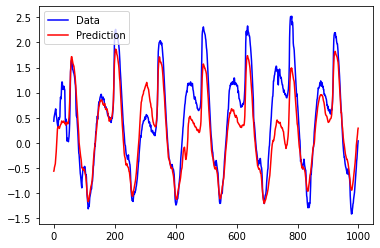

In [72]:
plt.plot(trY[-13932:-12932].reset_index(drop=True), color="blue", label="Data")
plt.plot(predsY[:1000], color="red", label="Prediction")
plt.legend()
plt.show()

In [74]:
!pip install sklearn

     |████████████████████████████████| 26.4 MB 3.0 MB/s eta 0:00:01
     |████████████████████████████████| 39.8 MB 93.6 MB/s eta 0:00:01
     |████████████████████████████████| 306 kB 84.0 MB/s eta 0:00:01
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1309 sha256=a66b36aff1a2873f391d6e33c5eb1b2c911fb86d3ae64069788b1658660c1c0a
  Stored in directory: /home/studio-lab-user/.cache/pip/wheels/e4/7b/98/b6466d71b8d738a0c547008b9eb39bf8676d1ff6ca4b22af1c
Successfully built sklearn


In [86]:
stds = stds.transpose()
means = means.transpose()

In [99]:
pd.DataFrame(np.array(finalY) * stds["Y"][0] + means["Y"][0]).to_csv("output.csv")

In [90]:
tests = trY[-13932:].reset_index(drop=True) * stds["Y"][0] + means["Y"][0]
predictions = np.array(predsY) * stds["Y"][0] + means["Y"][0]

In [94]:
predictions

array([435757.56, 438476.16, 444325.8 , ..., 562004.06, 561620.8 ,
       561538.9 ], dtype=float32)

In [96]:
from sklearn.metrics import mean_squared_error
import math 
from statistics import mean

rmse=math.sqrt(mean_squared_error(tests,predictions))

In [97]:
rmse

90933.46197809919